In [133]:
import os
import pandas as pd
import numpy as np
import datetime

In [134]:
os.getcwd()
os.chdir('C:/Users/Samruddhi/Desktop/Edwisor Project 1')
os.getcwd()

'C:\\Users\\Samruddhi\\Desktop\\Edwisor Project 1'

In [262]:
test= pd.read_csv('test.csv')

In [135]:
train_data= pd.read_csv('train_cab.csv')

In [136]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [137]:
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [138]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16041.000000,16065.000000,16065.000000,16065.000000,16065.000000,16010.000000
mean,15.015223,-72.462598,39.914622,-72.462138,39.897797,2.625273
std,430.474362,10.579029,6.827006,10.575706,6.187465,60.847920
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992157,40.734935,-73.991182,40.734643,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753565,1.000000
75%,12.500000,-73.966835,40.767380,-73.963642,40.768011,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [139]:
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [140]:
train_data['passenger_count'].describe()

count    16010.000000
mean         2.625273
std         60.847920
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

# Feature Engineering

In [141]:
train_data['year']=pd.DatetimeIndex(train_data['pickup_datetime']).year
train_data['month']=pd.DatetimeIndex(train_data['pickup_datetime']).month
train_data['day']=pd.DatetimeIndex(train_data['pickup_datetime']).day
train_data['hour']=pd.DatetimeIndex(train_data['pickup_datetime']).hour
train_data['minute']=pd.DatetimeIndex(train_data['pickup_datetime']).minute
train_data['second']=pd.DatetimeIndex(train_data['pickup_datetime']).second

In [142]:
train_data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17,26,21
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16,52,16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0,35,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4,30,42
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7,51,0


In [143]:
test_data['year']=pd.DatetimeIndex(test_data['pickup_datetime']).year
test_data['month']=pd.DatetimeIndex(test_data['pickup_datetime']).month
test_data['day']=pd.DatetimeIndex(test_data['pickup_datetime']).day
test_data['hour']=pd.DatetimeIndex(test_data['pickup_datetime']).hour
test_data['minute']=pd.DatetimeIndex(test_data['pickup_datetime']).minute
test_data['second']=pd.DatetimeIndex(test_data['pickup_datetime']).second

In [144]:
test_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8,24
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8,24
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53,44
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12,12
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12,12


In [146]:
train_data.drop(['pickup_datetime'],axis=1,inplace=True)

In [243]:
test_data.drop(['pickup_datetime'],axis=1,inplace=True)

In [244]:
test_data.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8,24
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8,24
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53,44
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12,12
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12,12


# Missing Value Analysis

In [149]:
train_data.isnull().sum()

fare_amount          24
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  0
month                 0
day                   0
hour                  0
minute                0
second                0
dtype: int64

In [150]:
len(train_data)

16065

In [151]:
from fancyimpute import KNN
from sklearn.preprocessing import Imputer

In [152]:
train_data_1= train_data.copy()

In [153]:
train_data_1['fare_amount']=pd.to_numeric(train_data_1['fare_amount'])

In [154]:
train_1= train_data_1

In [81]:
lis=[]
for i in range(0,train_1.shape[1]):
    if (train_1.iloc[:,i].dtypes == 'object'):
        train_1.iloc[:,i] = pd.Categorical(train_1.iloc[:,i])
        train_1.iloc[:,i] = train_1.iloc[:,i].cat.codes
        train_1.iloc[:,i] = train_1.iloc[:,i].astype('object')
        lis.append(train_1.columns[i])

In [82]:
train_1.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
0,4.5,1114,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17,26,21
1,16.9,2507,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16,52,16
2,5.7,6548,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0,35,0
3,7.7,8250,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4,30,42
4,5.3,2917,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7,51,0


In [155]:
train_1= pd.DataFrame(KNN(k=5).fit_transform(train_1),columns=train_1.columns)

Imputing row 1/16065 with 0 missing, elapsed time: 83.011
Imputing row 101/16065 with 0 missing, elapsed time: 83.120
Imputing row 201/16065 with 0 missing, elapsed time: 83.128
Imputing row 301/16065 with 0 missing, elapsed time: 83.132
Imputing row 401/16065 with 0 missing, elapsed time: 83.137
Imputing row 501/16065 with 0 missing, elapsed time: 83.143
Imputing row 601/16065 with 0 missing, elapsed time: 83.148
Imputing row 701/16065 with 0 missing, elapsed time: 83.152
Imputing row 801/16065 with 0 missing, elapsed time: 83.156
Imputing row 901/16065 with 0 missing, elapsed time: 83.160
Imputing row 1001/16065 with 0 missing, elapsed time: 83.163
Imputing row 1101/16065 with 0 missing, elapsed time: 83.166
Imputing row 1201/16065 with 0 missing, elapsed time: 83.167
Imputing row 1301/16065 with 0 missing, elapsed time: 83.170
Imputing row 1401/16065 with 0 missing, elapsed time: 83.174
Imputing row 1501/16065 with 0 missing, elapsed time: 83.177
Imputing row 1601/16065 with 0 missi

In [156]:
train_1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
count,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000,16065.000000
mean,15.010848,-72.462598,39.914622,-72.462138,39.897797,2.684353,2011.731030,6.260442,15.669468,13.497479,29.641332,16.163274
std,430.152713,10.579029,6.827006,10.575706,6.187465,61.250462,1.864208,3.447767,8.683336,6.520043,17.294351,19.490026
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992157,40.734935,-73.991182,40.734643,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,0.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753565,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,5.000000
75%,12.500000,-73.966835,40.767380,-73.963642,40.768011,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,32.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [157]:
train_1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,21.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,42.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0.0


# Outlier Analysis

In [158]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1af44cb45c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1af44cb4c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af44df8f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1af44cb4f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af44cbb668>],
 'means': []}

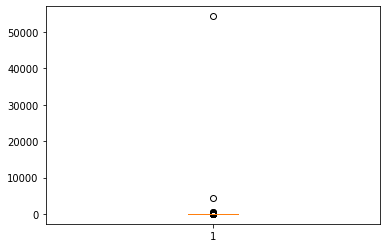

In [159]:
plt.boxplot(train_1['fare_amount'])

In [160]:
train_1 = train_1[((train_1['passenger_count'] > 0) & (train_1['passenger_count'] < 8)) & ((train_1['fare_amount'] > 0) & (train_1['fare_amount'] < 100))]

In [161]:
train_1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
count,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000,15974.000000
mean,11.280793,-72.477141,39.922647,-72.467427,39.900589,1.650227,2011.732753,6.262739,15.668962,13.492363,29.649493,16.123451
std,9.383622,10.530776,6.809629,10.558596,6.180600,1.264829,1.866987,3.446947,8.686011,6.520153,17.296025,19.485019
min,0.010000,-74.438233,-74.006893,-74.227047,-74.006377,0.120000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992155,40.734959,-73.991182,40.734705,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,0.000000
50%,8.500000,-73.981695,40.752640,-73.980168,40.753580,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,5.000000
75%,12.500000,-73.966837,40.767407,-73.963644,40.768015,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,32.000000
max,96.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,59.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1af44d03d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1af44d10470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af44d03908>],
 'medians': [<matplotlib.lines.Line2D at 0x1af44d10b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af44d10e48>],
 'means': []}

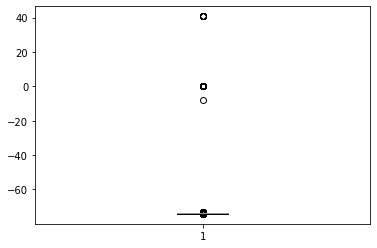

In [162]:
plt.boxplot(train_1['dropoff_longitude'])

In [31]:
cnames= ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [32]:
q75,q25 = np.percentile(train_1['fare_amount'],[75,25])
iqr= q75 - q25      
mini= q25 - (iqr*1.5)
maxi= q75 + (iqr*1.5)

In [38]:
q75_1,q25_1 = np.percentile(train_1['pickup_longitude'],[75,25])
iqr_1= q75_1 - q25_1      
mini_1= q25_1 - (iqr_1*1.5)
maxi_1= q75_1 + (iqr_1*1.5)

In [ ]:
q75_2,q25_1 = np.percentile(train_1['pickup_longitude'],[75,25])
iqr_1= q75_1 - q25_1      
mini_1= q25_1 - (iqr_1*1.5)
maxi_1= q75_1 + (iqr_1*1.5)

In [163]:
for i in cnames:
    q75,q25 = np.percentile(train_1[i],[75,25])
    iqr= q75 - q25      
    mini= q25 - (iqr*1.5)
    maxi= q75 + (iqr*1.5)
    train_1.loc[train_1[i]< mini,i]=np.nan
    train_1.loc[train_1[i]> maxi,i]=np.nan
    train_1= train_1.dropna()

In [164]:
train_1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second
count,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000,13213.000000
mean,8.584086,-73.981857,40.752997,-73.981083,40.753347,1.649974,2011.705517,6.229320,15.657459,13.668811,29.722849,16.134337
std,3.829240,0.016051,0.021129,0.016492,0.021894,1.267908,1.865342,3.449751,8.687304,6.331605,17.294713,19.476172
min,0.010000,-74.018108,40.693504,-74.019535,40.694260,0.120000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992845,40.738617,-73.992104,40.738842,1.000000,2010.000000,3.000000,8.000000,9.000000,15.000000,0.000000
50%,7.700000,-73.982657,40.753638,-73.982105,40.754522,1.000000,2012.000000,6.000000,16.000000,14.000000,30.000000,5.000000
75%,10.500000,-73.971382,40.766868,-73.970840,40.767269,2.000000,2013.000000,9.000000,23.000000,19.000000,45.000000,32.000000
max,22.100000,-73.932999,40.810862,-73.935413,40.811382,6.000000,2015.000000,12.000000,31.000000,23.000000,59.000000,59.000000


# Feature Selection

In [165]:
import seaborn as sns
from scipy.stats import chi2_contingency

In [167]:
corr= train_1.corr()

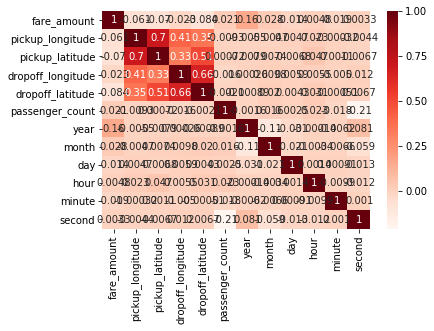

In [168]:
sns.heatmap(corr,annot=True, cmap=plt.cm.Reds)

# Model Validation 

In [216]:
from sklearn import metrics
from sklearn.model_selection import KFold

In [217]:
inde_var= ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','year','month','day','hour','minute','second']

In [218]:
X= train_1[inde_var]
y= train_1.fare_amount

# Linear Regression

In [219]:
from sklearn.model_selection import cross_val_score

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
LR= LinearRegression()

In [222]:
r2= cross_val_score(LR,X,y,cv=10,scoring='r2').mean()
mae= cross_val_score(LR,X,y,cv=10,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(LR,X,y,cv=10,scoring='neg_mean_squared_error').mean()

In [223]:
print('Rsquared: ',r2,' MAE: ',mae,' MSE: ',mse)

Rsquared:  0.037396010680458246  MAE:  -2.947853205984117  MSE:  -14.099989305098095


# Decision Tree

In [224]:
from sklearn.tree import DecisionTreeRegressor

In [225]:
DT = DecisionTreeRegressor()

In [226]:
r2= cross_val_score(DT,X,y,cv=10,scoring='r2').mean()
mae= cross_val_score(DT,X,y,cv=10,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(DT,X,y,cv=10,scoring='neg_mean_squared_error').mean()

In [227]:
print('Rsquared: ',r2,' MAE: ',mae,' MSE: ',mse)

Rsquared:  0.33033405703441676  MAE:  -2.2574513224519657  MSE:  -9.74796609334353


# KNN 

In [228]:
from sklearn.neighbors import KNeighborsRegressor

In [229]:
KNN = KNeighborsRegressor(n_neighbors=5)

In [230]:
r2= cross_val_score(KNN,X,y,cv=10,scoring='r2').mean()
mae= cross_val_score(KNN,X,y,cv=10,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(KNN,X,y,cv=10,scoring='neg_mean_squared_error').mean()

In [231]:
print('Rsquared: ',r2,' MAE: ',mae,' MSE: ',mse)

Rsquared:  -0.16085728540952032  MAE:  -3.2182627162643067  MSE:  -16.995671448567073


# Random Forest 

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
RF= RandomForestRegressor(n_estimators=500,max_features=4)

In [250]:
r2= cross_val_score(RF,X,y,cv=10,scoring='r2').mean()
mae= cross_val_score(RF,X,y,cv=10,scoring='neg_mean_absolute_error').mean()
mse= cross_val_score(RF,X,y,cv=10,scoring='neg_mean_squared_error').mean()

In [251]:
print('Rsquared: ',r2,' MAE: ',mae,' MSE: ',mse)

Rsquared:  0.6707608012497881  MAE:  -1.6251771516466715  MSE:  -4.820839333571323


In [ ]:
# Linear Regression-> Rsquared:  0.037396010680458246  MAE:  -2.947853205984117  MSE:  -14.099989305098095
# Decision tree-> Rsquared:  0.33033405703441676  MAE:  -2.2574513224519657  MSE:  -9.74796609334353
# KNN-> Rsquared:  -0.16085728540952032  MAE:  -3.2182627162643067  MSE:  -16.995671448567073
# Random Forest-> Rsquared:  0.6707608012497881  MAE:  -1.6251771516466715  MSE:  -4.820839333571323
#

# Model Development

In [237]:
RF_model= RandomForestRegressor(n_estimators=500,max_features=4).fit(X,y)

In [240]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [245]:
RF_predict= RF_model.predict(test_data)

In [255]:
RF_predict[2]

6.148799999999996

In [253]:
len(test_data)

9914

In [258]:
test_1=test_data.copy()

In [259]:
test_1['fare_amount']=''

In [260]:
for i in range(len(test_data)):
    test_1['fare_amount'][i] = RF_predict[i]

C:\Users\Samruddhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [261]:
test_1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,second,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8,24,9.04556
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8,24,8.76692
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53,44,6.1488
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12,12,8.2723
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12,12,12.4898


In [263]:
test['fare_amount']= test_1['fare_amount']

In [264]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,9.04556
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,8.76692
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,6.1488
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,8.2723
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,12.4898


In [266]:
test.to_csv('final_result_Python.csv',index=False)